In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
gdp_df = pd.read_csv('../data/raw_data/per-capita-plastic-waste-vs-gdp-per-capita.csv')

In [35]:
display(gdp_df.head(30))

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1280.4631,21000258.0,NaN
2,Afghanistan,AFG,2003,NaN,1292.3335,22645136.0,NaN
3,Afghanistan,AFG,2004,NaN,1260.0605,23553554.0,NaN
4,Afghanistan,AFG,2005,NaN,1352.3207,24411196.0,NaN
5,Afghanistan,AFG,2006,NaN,1366.9932,25442946.0,NaN
6,Afghanistan,AFG,2007,NaN,1528.3446,25903306.0,NaN
7,Afghanistan,AFG,2008,NaN,1556.8445,26427204.0,NaN
8,Afghanistan,AFG,2009,NaN,1823.7426,27385310.0,NaN
9,Afghanistan,AFG,2010,NaN,2026.1638,28189672.0,NaN


In [36]:
gdp_df.isna().sum()

Entity                                                     0
Code                                                    3537
Year                                                       0
Per capita plastic waste (kg/person/day)               58374
GDP per capita, PPP (constant 2017 international $)    52214
Population (historical estimates)                        308
Continent                                              58275
dtype: int64

In [37]:
gdp_df.shape

(58560, 7)

In [38]:
gdp_df['Year'].unique()

array([  2015,   2002,   2003,   2004,   2005,   2006,   2007,   2008,
         2009,   2010,   2011,   2012,   2013,   2014,   2016,   2017,
         2018,   2019,   2020,   2021, -10000,  -9000,  -8000,  -7000,
        -6000,  -5000,  -4000,  -3000,  -2000,  -1000,      0,    100,
          200,    300,    400,    500,    600,    700,    800,    900,
         1000,   1100,   1200,   1300,   1400,   1500,   1600,   1700,
         1710,   1720,   1730,   1740,   1750,   1760,   1770,   1780,
         1790,   1800,   1801,   1802,   1803,   1804,   1805,   1806,
         1807,   1808,   1809,   1810,   1811,   1812,   1813,   1814,
         1815,   1816,   1817,   1818,   1819,   1820,   1821,   1822,
         1823,   1824,   1825,   1826,   1827,   1828,   1829,   1830,
         1831,   1832,   1833,   1834,   1835,   1836,   1837,   1838,
         1839,   1840,   1841,   1842,   1843,   1844,   1845,   1846,
         1847,   1848,   1849,   1850,   1851,   1852,   1853,   1854,
      

In [39]:
gdp_df = gdp_df.drop(columns =['Continent'])

In [40]:
gdp_df.columns

Index(['Entity', 'Code', 'Year', 'Per capita plastic waste (kg/person/day)',
       'GDP per capita, PPP (constant 2017 international $)',
       'Population (historical estimates)'],
      dtype='object')

In [41]:
##It seems like there is only waste per capita data for 2010 available
gdp_df_2010 = gdp_df.dropna(subset=['Per capita plastic waste (kg/person/day)'])

gdp_df_2010.head()
print(gdp_df_2010.shape)

(186, 6)


In [42]:
gdp_df_2010.isna().sum()

Entity                                                  0
Code                                                    0
Year                                                    0
Per capita plastic waste (kg/person/day)                0
GDP per capita, PPP (constant 2017 international $)    37
Population (historical estimates)                       4
dtype: int64

In [44]:
cols = []
for colname in gdp_df_2010.columns:
    cols.append(colname.lower())

gdp_df_2010.columns = cols

In [45]:
gdp_df_2010.columns

Index(['entity', 'code', 'year', 'per capita plastic waste (kg/person/day)',
       'gdp per capita, ppp (constant 2017 international $)',
       'population (historical estimates)'],
      dtype='object')

In [46]:
gdp_df_2010 = gdp_df_2010.rename(columns={'per capita plastic waste (kg/person/day)':'per_capita_plastic_waste',
                                'gdp per capita, ppp (constant 2017 international $)':'gdp_per_capita',
                                'population (historical estimates)':'population'})

In [47]:
gdp_df_2010.head()

,entity,code,year,per_capita_plastic_waste,gdp_per_capita,population
596,Albania,ALB,2010,0.069,10751.4210,2913402.0
855,Algeria,DZA,2010,0.144,11007.7470,35856348.0
1487,Angola,AGO,2010,0.062,7691.1313,23364196.0
1746,Anguilla,AIA,2010,0.252,NaN,13192.0
1871,Antigua and Barbuda,ATG,2010,0.660,18702.0900,85710.0


In [48]:
##Checking for hich
rows_with_nan = gdp_df_2010[gdp_df_2010['gdp_per_capita'].isna()]

# Display the rows with NaN values
display(rows_with_nan)


,entity,code,year,per_capita_plastic_waste,gdp_per_capita,population
1746,Anguilla,AIA,2010,0.252,NaN,13192.0
7394,British Virgin Islands,VGB,2010,0.252,NaN,27578.0
10117,Channel Islands,OWID_CIS,2010,0.252,NaN,NaN
10637,Christmas Island,CXR,2010,0.252,NaN,NaN
10639,Cocos Islands,CCK,2010,0.252,NaN,NaN
11399,Cook Islands,COK,2010,0.144,NaN,17237.0
12261,Cuba,CUB,2010,0.089,NaN,11290420.0
13713,Djibouti,DJI,2010,0.103,NaN,919206.0
15824,Eritrea,ERI,2010,0.045,NaN,3147733.0
17531,Falkland Islands,FLK,2010,0.252,NaN,3206.0


In [78]:
#gdp_missing_data_df = pd.read_csv('../data/raw_data/UN_gdp_2010.csv')

#display(gdp_missing_data_df.head())

#print(gdp_missing_data_df.isna().sum())

#print(gdp_missing_data_df.shape)

In [79]:
#cols = []
#for colname in gdp_missing_data_df.columns:
 #   cols.append(colname.lower())

#gdp_missing_data_df.columns = cols

In [80]:
#gdp_missing_data_df = gdp_missing_data_df.rename(columns={'country or area':'entity',
                               # 'value':'gdp_per_capita_value'})

In [81]:
#gdp_missing_data_df.columns

In [82]:
#gdp_missing_data_df.head(30)

In [83]:
#data_2010_df = pd.merge(gdp_df_2010, gdp_missing_data_df, on='entity', how='left')

#display(data_2010_df.head(30))

#print(data_2010_df.isna().sum())

#print(data_2010_df.shape)

#print(data_2010_df['entity'].unique())

In [84]:
#rows_with_nan = data_2010_df[data_2010_df['gdp_per_capita_value'].isna()]

#display(rows_with_nan)

In [89]:
gdp_df_2010 = gdp_df_2010.dropna(subset=['gdp_per_capita'])

display(gdp_df_2010.head())

print(gdp_df_2010.shape)

print(gdp_df_2010.isna().sum())

,entity,code,year,per_capita_plastic_waste,gdp_per_capita,population
596,Albania,ALB,2010,0.069,10751.4210,2913402.0
855,Algeria,DZA,2010,0.144,11007.7470,35856348.0
1487,Angola,AGO,2010,0.062,7691.1313,23364196.0
1746,Anguilla,AIA,2010,0.252,19469.4000,13192.0
1871,Antigua and Barbuda,ATG,2010,0.660,18702.0900,85710.0


(150, 6)
entity                      0
code                        0
year                        0
per_capita_plastic_waste    0
gdp_per_capita              0
population                  0
dtype: int64


In [104]:
import os  
os.makedirs('../data/cleaned_data', exist_ok=True)  
gdp_df_2010.to_csv('../data/cleaned_data/2010_gdp_pop_final.csv') 

In [ ]:
##HYPOTHESIS TESTING: linear regression analysis

##Hypothesis H0: plastic waste epr capita is dependend on gdp per capita

In [93]:
correlation = gdp_df_2010['gdp_per_capita'].corr(gdp_df_2010['per_capita_plastic_waste'])

correlation
#0.3679486421928206
#0.37 suggests a moderate positive relationship
#the correlation is positive --> indicates that as the values of one variable increase the values of the other variable tend to increase as well


0.3679486421928206

In [103]:
correlation = gdp_df_2010['population'].corr(gdp_df_2010['per_capita_plastic_waste'])

correlation

##-0.127669134793611
##relatively weak negative corr, indicating that the relationship between these two variables is not very strong

-0.127669134793611

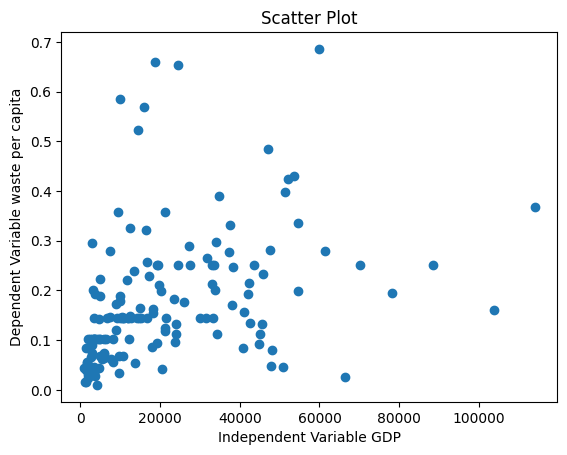

In [95]:
import matplotlib.pyplot as plt

plt.scatter(gdp_df_2010['gdp_per_capita'], gdp_df_2010['per_capita_plastic_waste'])
plt.xlabel('Independent Variable GDP')
plt.ylabel('Dependent Variable waste per capita')
plt.title('Scatter Plot')
plt.show()

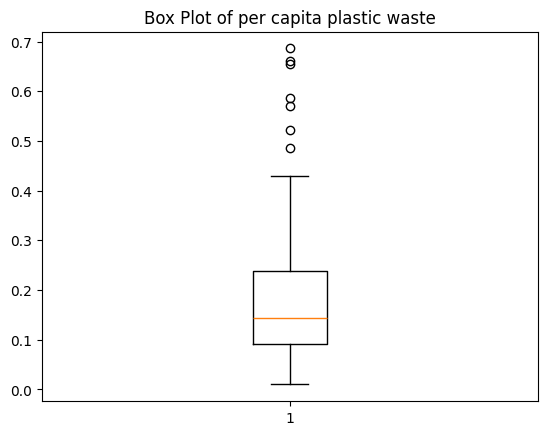

In [97]:
plt.boxplot(gdp_df_2010['per_capita_plastic_waste'])
plt.title('Box Plot of per capita plastic waste')
plt.show()

In [ ]:
plt.boxplot(gdp_df_2010['per_capita_plastic_waste'])
plt.title('Box Plot of per capita plastic waste')
plt.show()

In [91]:
import statsmodels.api as sm

#independent variable
X = sm.add_constant(gdp_df_2010['gdp_per_capita'])

#dependent variable
y = gdp_df_2010['per_capita_plastic_waste']

# Fit the regression model
model = sm.OLS(y, X).fit()

#
print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     per_capita_plastic_waste   R-squared:                       0.135
Model:                                  OLS   Adj. R-squared:                  0.130
Method:                       Least Squares   F-statistic:                     23.17
Date:                      Tue, 19 Dec 2023   Prob (F-statistic):           3.62e-06
Time:                              17:12:05   Log-Likelihood:                 102.24
No. Observations:                       150   AIC:                            -200.5
Df Residuals:                           148   BIC:                            -194.5
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Assuming gdp_df_2010 is your DataFrame
X = gdp_df_2010[['gdp_per_capita']]
y = gdp_df_2010['per_capita_plastic_waste']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Print the coefficient for gdp_per_capita
print(f'Coefficient for gdp_per_capita: {model.coef_[0]}')

# Statistical Test
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(X_train['gdp_per_capita'], y_train)
print(f'P-value: {p_value}')


Coefficient for gdp_per_capita: 2.626927279355129e-06
P-value: 4.389657732286458e-06
